In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from pybind_util import Util

util = Util()

initial [Util] for image processing


In [25]:
i = 3
lq = loadmat(f"test/test_{i}.mat")['data']
hq = loadmat(f"test/test_sr{i}.mat")['data']

In [26]:
lq.mean()

193.444066

In [27]:
lq = lq / lq.max()
hq = hq / hq.max()

(<Axes: title={'center': 'hq'}>,
 (-0.5, 1999.5, 1999.5, -0.5),
 Text(0.5, 1.0, 'hq'))

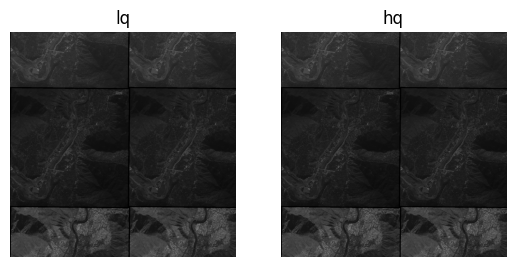

In [28]:
plt.subplot(121), plt.imshow(lq, 'gray'), plt.axis('off'), plt.title('lq')
plt.subplot(122), plt.imshow(hq, 'gray'), plt.axis('off'), plt.title('hq')

In [32]:
mux = util.read_gdal_mul('/data/dataset/project/1-MUL.TIF')

read_gdal : xmin = [0], xmax = [1660], mean = [197.4339804559893], shape = (2105, 2105, 4), dtype = uint16


In [34]:
for i in range(4):
    img = mux[:, :, i]
    print(img.min(), '    ', img.max(), '   ', img.mean())

0      771     167.21466816368672
0      1202     225.87075789461807
0      1007     139.9284167884406
0      1660     256.7220789772118


In [37]:
h, w, c = mux.shape
new_img = mux.reshape(h * w * c, 1)